Linear Regression
---

In [1]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
### Explanation in https://stackoverflow.com/questions/50394873/import-pandas-datareader-gives-importerror-cannot-import-name-is-list-like
#import pandas_datareader as web
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import random
import yfinance as yf
import statsmodels.api as sm

#### List of tickers

In [2]:
tickers = ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DWDP', 'DPS', 'DTE', 'DRE', 'DUK', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FISV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'HII', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IQV', 'IRM', 'JEC', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LEG', 'LEN', 'LUK', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'KORS', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PDCO', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RJF', 'RTN', 'O', 'RHT', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIG', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TROW', 'TPR', 'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'TMO', 'TIF', 'TWX', 'TJX', 'TMK', 'TSS', 'TSCO', 'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'HCN', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']

In [3]:
data_source = 'yahoo'
start, end = '2015-01-01', '2018-01-01'

ticker = 'SPY'
df = yf.download(ticker,start, end)
df.head()
df = df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
df.columns=[ticker]

nbTickers = len(tickers)
nbExtract = 7 ## Number of tickers to consider
listExtractTickers = [ticker]
listTemp = random.sample(tickers, nbExtract)
for i in range(nbExtract):
    listExtractTickers.append(listTemp[i]) ## select nbExtract out of the whole list
print("List of extracted tickers: ", listExtractTickers)

[*********************100%***********************]  1 of 1 downloaded
List of extracted tickers:  ['SPY', 'PFG', 'K', 'GS', 'INTC', 'APD', 'NOV', 'BXP']


In [4]:
## We construct a DataFrame with the first 5 tickers only
for ticker in listExtractTickers[1:]:
    df0 = yf.download(ticker, start, end)
    df0 = df0.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
    df0.columns=[ticker]
    df = pd.concat([df, df0], axis=1)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [5]:
print("Total number of tickers:", nbTickers)
print("Numer of observations:", len(df))
print("Number of tickers selected:", nbExtract)
df.head()

Total number of tickers: 505
Numer of observations: 755
Number of tickers selected: 7


SPY    PFG      K      GS   INTC     APD    NOV     BXP
Date                                                                  
2015-01-02  205.43  51.81  65.48  194.41  36.36  134.53  65.49  131.26
2015-01-05  201.72  50.11  64.26  188.34  35.95  130.23  62.50  132.45
2015-01-06  199.82  49.40  64.45  184.53  35.28  130.19  61.73  135.02
2015-01-07  202.31  50.25  66.01  187.28  36.02  131.59  61.79  136.53
2015-01-08  205.90  51.73  67.21  190.27  36.69  134.63  63.63  137.08

Compute the returns

In [6]:
returns = df.pct_change(1)
returns= returns.dropna()
returns.head()

SPY       PFG         K        GS      INTC       APD  \
Date                                                                     
2015-01-05 -0.018060 -0.032812 -0.018632 -0.031223 -0.011276 -0.031963   
2015-01-06 -0.009419 -0.014169  0.002957 -0.020229 -0.018637 -0.000307   
2015-01-07  0.012461  0.017206  0.024205  0.014903  0.020975  0.010754   
2015-01-08  0.017745  0.029453  0.018179  0.015965  0.018601  0.023102   
2015-01-09 -0.008014 -0.012372 -0.011605 -0.015347  0.001908 -0.014930   

                 NOV       BXP  
Date                            
2015-01-05 -0.045656  0.009066  
2015-01-06 -0.012320  0.019404  
2015-01-07  0.000972  0.011184  
2015-01-08  0.029778  0.004028  
2015-01-09 -0.027503  0.005034

### Scatter plot

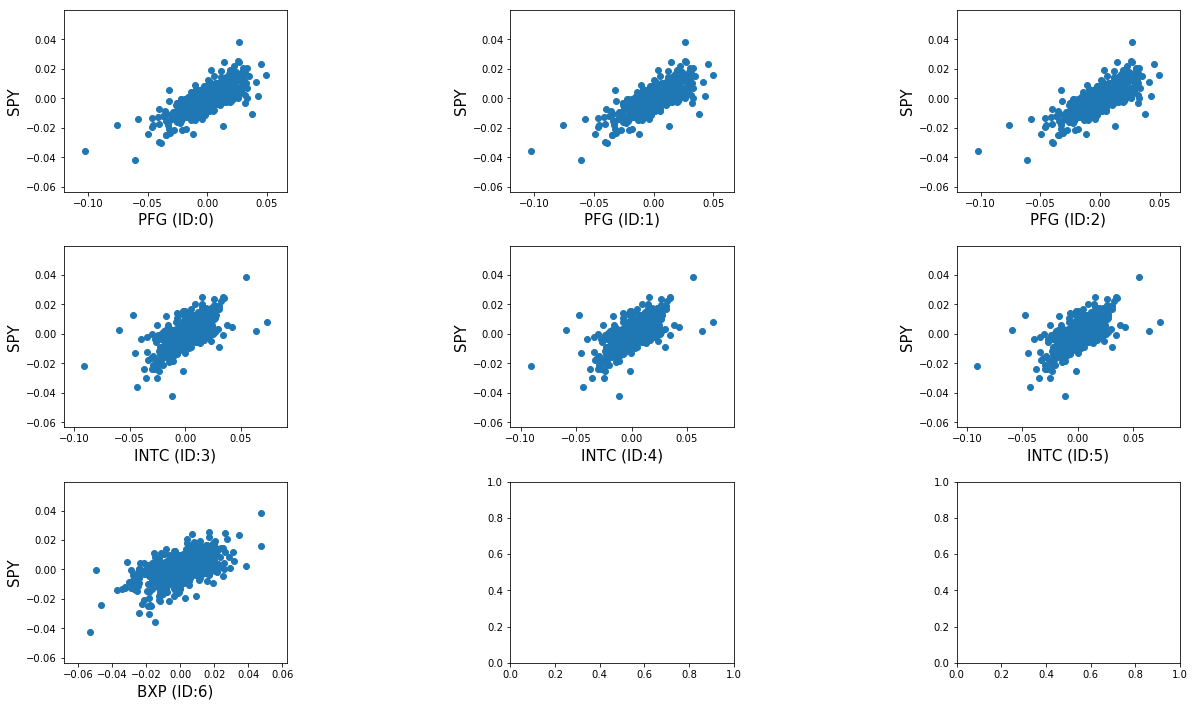

In [7]:
nbCols = 3
nbRows = 1+nbExtract//nbCols
rem = nbExtract%nbCols
fig, axs = plt.subplots(nrows=nbRows, ncols=nbCols, figsize=(20, 4*nbRows))
for i in range(nbRows):
    for j in range(0,nbCols):
        if (nbCols*i+j)<nbExtract:
            plt.subplot(nbRows, nbCols, nbCols*i+j+1)
            idCol = returns.columns[3*i+1]
            plt.scatter(returns[idCol], returns["SPY"])
            plt.ylabel("SPY", size=15)
            plt.xlabel("%s (ID:%i)" %(idCol, nbCols*i+j), size=15)
plt.subplots_adjust(hspace=0.3, wspace=1.)
plt.show()

### Linear regression of SPY against one of the components

#### Choice of the component

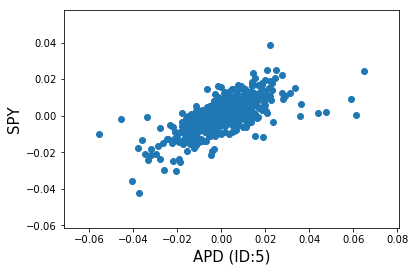

In [8]:
choiceIndex = 5
stockLabel = returns.columns[choiceIndex]
plt.figure(figsize = (6,4))
idCol = returns.columns[choiceIndex]
plt.scatter(returns[stockLabel], returns["SPY"])
plt.ylabel("SPY", size=15)
plt.xlabel("%s (ID:%i)" %(idCol, choiceIndex), size=15)
plt.show()

#### Run a linear regression

In [15]:
X = returns[stockLabel].values
Y = returns["SPY"].values
modle = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.459
Model:                            OLS   Adj. R-squared (uncentered):              0.458
Method:                 Least Squares   F-statistic:                              638.5
Date:                Wed, 27 Nov 2019   Prob (F-statistic):                   1.69e-102
Time:                        14:57:37   Log-Likelihood:                          2819.7
No. Observations:                 754   AIC:                                     -5637.
Df Residuals:                     753   BIC:                                     -5633.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [18]:
print('parameters: ', model.params)

parameters:  [0.45560758]


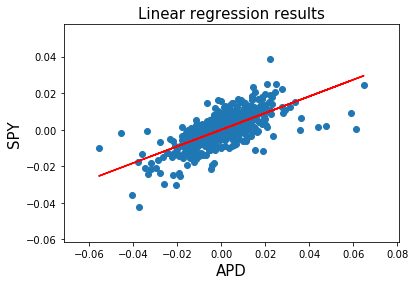

In [19]:
plt.figure(figsize = (6, 4))
plt.scatter(returns[stockLabel], returns["SPY"])
plt.ylabel('SPY', size=15)
plt.xlabel(stockLabel, size=15)
plt.title("Linear regression results", size=15)
plt.plot(returns[stockLabel], model.predict(),'r-')
plt.show()

### Does adding variables increase the $R^2$?

In [20]:
rSquared = []
N = 1
regressionTickers = returns.columns[1]
X = returns[regressionTickers].values
Y = returns["SPY"].values
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
rSquared.append(model.rsquared)

for N in range(2, nbExtract):
    regressionTickers = [returns.columns[i] for i in range(1, N)]
    X = np.column_stack((returns[rt].values for rt in regressionTickers))
    Y = returns["SPY"].values
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    rSquared.append(model.rsquared)

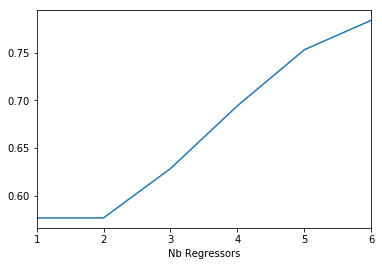

In [21]:
df = pd.DataFrame({ 'Nb Regressors' : range(1,nbExtract),'RSquared' : rSquared})
df = df.set_index('Nb Regressors')
df['RSquared'].plot();

#### Linear Regression with all the factors

In [23]:
N = nbExtract
regressionTickers = [returns.columns[i] for i in range(1, N)]
X = np.column_stack((returns[rt].values for rt in regressionTickers))
Y = returns["SPY"].values
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     460.0
Date:                Wed, 27 Nov 2019   Prob (F-statistic):          6.14e-247
Time:                        14:57:59   Log-Likelihood:                 3172.1
No. Observations:                 754   AIC:                            -6330.
Df Residuals:                     747   BIC:                            -6298.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.999      0.3

### Linear Regression using Scikit Learn

In [24]:
from sklearn.linear_model import LinearRegression
x, y = returns[stockLabel].values, returns["SPY"].values
length = len(returns[stockLabel].values)
x = x.reshape(length, 1)
y = y.reshape(length, 1)
regr = LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

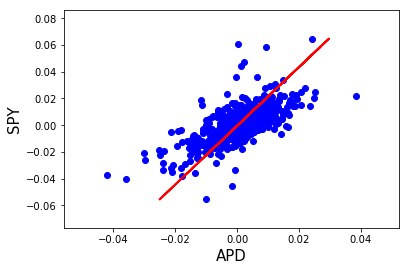

In [25]:
plt.scatter(y, x,  color='blue')
plt.plot(regr.predict(x), x, color='red', linewidth=2)
plt.xlabel(stockLabel, size=15)
plt.ylabel("SPY", size=15)
plt.show()

In [26]:
print("Regression coefficient: ", regr.coef_)
print("Regression intercept: ", regr.intercept_)

Regression coefficient:  [[0.45505146]]
Regression intercept:  [0.00022708]
